# LENDING CLUB CASE STUDY

### IGNORE WARNINGS

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

### IMPORTING REQUIRED LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### IMPORTING & READING THE DATASET

In [3]:
# Importing dataset
data = pd.read_csv('loan.csv')
 
# making a local copy of imported data
cpy_data = data 

# To display maximum rows and columns
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

### NUMBER OF ROWS AND COLUMNS IN DATASET

In [4]:
# To find the number of rows and columns
rows, columns = data.shape
print(f'Dataset has {rows} rows and {columns} columns.')

Dataset has 39717 rows and 111 columns.


### NUMBER OF FEATURES

In [5]:
# Looping to find the number of categorical and numerical features
num, obj = 0,0
for feature in data.columns:
    if data.dtypes[feature] != 'O':
        num += 1
    else:
        obj += 1
print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
print(f'There are {num} numerical features and {obj} categorical features.')

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
There are 87 numerical features and 24 categorical features.


### ANALYSING THE TARGET FEATURE BEFORE DATA CLEANING

##### VISUALIZATION ON TARGET FEATURE

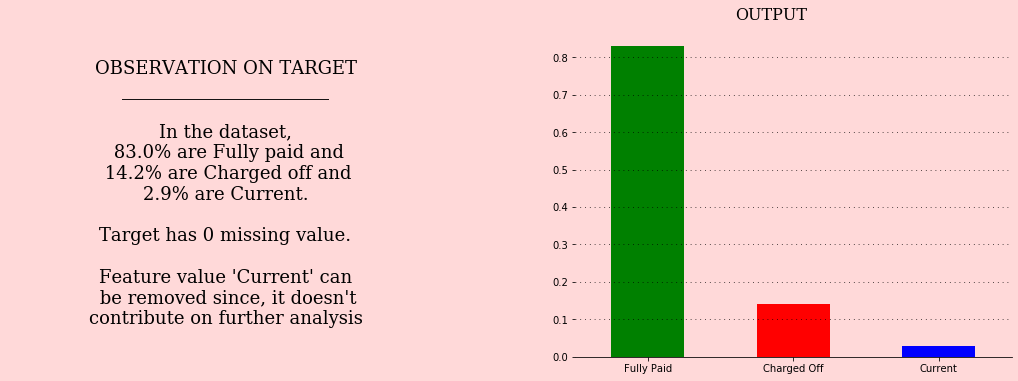

In [6]:
# Creating plot structure
fig = plt.figure(figsize=(18,6))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.3,hspace=0.15)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)
    
# Plotting graph
data['loan_status'].value_counts(normalize=True).plot.bar(color=['green', 'red', 'blue'])
sec_2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.xticks(rotation=0)
sec_2.text(0.6,0.9,'OUTPUT',fontsize=16, fontfamily='serif')

# Number of missing values
m_vals = data['loan_status'].isnull().sum()

# Narrating the observation
Max, Med, Min = data['loan_status'].value_counts(normalize=True)*100
Max = np.round(Max, 1)
Med = np.round(Med, 1)
Min = np.round(Min, 1)

sec_1.text(0.5,0.5,f"OBSERVATION ON TARGET\n_______________________\n\nIn the dataset,\n {Max}% are Fully paid \
and\n {Med}% are Charged off and\n{Min}% are Current.\n\nTarget has {m_vals} missing value.\n\nFeature value \
'Current' can\n be removed since, it doesn't\ncontribute on further analysis",
ha='center',va='center',size=18, family='serif')

# Removing axis and spines
sec_1.xaxis.set_visible(False)
sec_1.yaxis.set_visible(False)
for position in ['left', 'right', 'top', 'bottom']:
    for selection in [sec_1, sec_2]:
        if position == 'bottom' and selection == sec_2:
            selection.spines[position].set_visible(True)
        else:
            selection.spines[position].set_visible(False)

##### TREATMENT ON DATA BASED ON TARGET

In [7]:
# Unique count before feature value removal:
print('Unique count before removal: ')
print(np.round((data.loan_status.value_counts()*100)/len(data),2))

# Removing attribute value "Current"
data = data[data['loan_status'] != 'Current']

# Unique count after feature value removal:
print('\nUnique count after removal: ')
print(np.round((data.loan_status.value_counts()*100)/len(data),2))

Unique count before removal: 
Fully Paid     82.96
Charged Off    14.17
Current         2.87
Name: loan_status, dtype: float64

Unique count after removal: 
Fully Paid     85.41
Charged Off    14.59
Name: loan_status, dtype: float64


### LOOKING FOR DUPLICATES IN THE DATASET

In [8]:
# Looking for data duplicates
row, column = data[data.duplicated()].shape
print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicates in the dataset.')

There are no duplicates in the dataset.


### FEATURES WITH MISSING VALUES

In [9]:
# Looping to find the missing values

mv_gtr30_lst = []  # List to store feature with more than 30% missing value
mv_lsr30_lst = []  # List to store feature with less than 30% missing value

for feature in data:
    if (data[feature].isnull().mean()*100) > 30.0:
        mv_gtr30_lst.append(feature)
    elif 0.000 < (data[feature].isnull().mean()*100) < 30.0:  
        mv_lsr30_lst.append(feature)
        
print(f'There are {len(mv_gtr30_lst)} features that has more than 30% missing value.')
print(f'There are {len(mv_lsr30_lst)} features that has less than 30% missing value.')

There are 58 features that has more than 30% missing value.
There are 10 features that has less than 30% missing value.


### NUMBER OF UNIQUE CATEGORICAL FEATURES

In [10]:
# Looping to find the number of unique categorical features
s_cunique = 0
n_cunique = 0

for feature in data:
    if data[feature].dtype == 'O' : 
        if len(data[feature].unique())==1:
            s_cunique += 1
        else:
            n_cunique += 1

print(f'There are {s_cunique} categorical features that has one unique value.')
print(f'There are {n_cunique} categorical features that has more than one unique value.')

There are 4 categorical features that has one unique value.
There are 20 categorical features that has more than one unique value.


##### CATEGORICAL FEATURES THAT HAS ONE UNIQUE VALE

In [11]:
# Looping to find the categorical feature with one unique value
ucat_lst = []

for feature in data:
    if data[feature].dtype == 'O' and feature != 'loan_status':
        if len(data[feature].unique())==1:
            ucat_lst.append(feature)
            
print(f'{ucat_lst} - are categorical features with one unique value')

['pymnt_plan', 'initial_list_status', 'next_pymnt_d', 'application_type'] - are categorical features with one unique value


### NUMBER OF UNIQUE NUMERICAL FEATURES

In [12]:
s_nunique = 0
n_nunique = 0
for feature in data:
    if data[feature].dtype != 'O':
        if len(data[feature].unique())==1:
            s_nunique += 1
        else:
            n_nunique += 1

print(f'There are {s_nunique} numerical features that has one unique value including Nan')
print(f'There are {n_nunique} numerical features that has more than one unique value')

There are 59 numerical features that has one unique value including Nan
There are 28 numerical features that has more than one unique value


##### NUMERICAL FEATURES THAT HAS ONE UNIQUE VALUE

In [13]:
# Looping to find the number of unique numerical features
unum_lst = []

for feature in data:
    if data[feature].dtype != 'O' and len(data[feature].unique())==1 :
        if data[feature].isnull().all(axis=0) :
            continue
        else:
            unum_lst.append(feature)
            
print(f'{unum_lst} - are numerical features with one unique value and not NaN')

['out_prncp', 'out_prncp_inv', 'policy_code', 'acc_now_delinq', 'delinq_amnt'] - are numerical features with one unique value and not NaN


### REMOVING FEATURES

In [14]:
# Merging the list of features to remove
from itertools import chain
remove_feat = list(chain(mv_gtr30_lst,     # mv_gtr30_lst - list of feature that has more than 30% missing values.
                         ucat_lst,         # ucat_lst - list of categorical feature that has one unique value.
                         unum_lst))        # unum_lst - list of numerical feature that has one unique value.

print(f'Number of features to be removed: {len(remove_feat)}')
print(f'Number of columns in raw data: {data.shape[1]}')

# Removing the list features
for feature in data.columns:
    if feature in remove_feat:
        del data[feature]
        
# Data after removing the features
print(f'Number of columns in processed data: {data.shape[1]}')

Number of features to be removed: 67
Number of columns in raw data: 111
Number of columns in processed data: 45


### COLUMNS AFTER REMOVING FEATURES

In [15]:
print(data.columns.values)

['id' 'member_id' 'loan_amnt' 'funded_amnt' 'funded_amnt_inv' 'term'
 'int_rate' 'installment' 'grade' 'sub_grade' 'emp_title' 'emp_length'
 'home_ownership' 'annual_inc' 'verification_status' 'issue_d'
 'loan_status' 'url' 'purpose' 'title' 'zip_code' 'addr_state' 'dti'
 'delinq_2yrs' 'earliest_cr_line' 'inq_last_6mths' 'open_acc' 'pub_rec'
 'revol_bal' 'revol_util' 'total_acc' 'total_pymnt' 'total_pymnt_inv'
 'total_rec_prncp' 'total_rec_int' 'total_rec_late_fee' 'recoveries'
 'collection_recovery_fee' 'last_pymnt_d' 'last_pymnt_amnt'
 'last_credit_pull_d' 'collections_12_mths_ex_med'
 'chargeoff_within_12_mths' 'pub_rec_bankruptcies' 'tax_liens']


### OBSERVATION FROM DATA DICTIONARY

* Features such as **"id" , 'member_id', 'url'** has **entirely unique** value.
* Based on the description provided in **data dictionary**,
    * **title** - The loan title provided by the borrower.
    * **emp_title** - The job title supplied by the Borrower when applying for the loan.
    * **out_prncp_inv** - Remaining outstanding principal for portion of total amount funded by investors
    * **zip_code** - The first 3 numbers of the zip code provided by the borrower in the loan application.
    * **last_credit_pull_d** - The most recent month LC pulled credit for this loan.
    * **total_rec_late_fee** - Late fees received to date.
    * **chargeoff_within_12_mths** - Number of charge-offs within 12 months.
    * **delinq_2yrs** - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
    * **last_pymnt_d** - Last month payment was received.
    * **revol_bal** - Total credit revolving balance.
    * **out_prncp** - Remaining outstanding principal for total amount funded.
    * **total_pymnt** - Payments received to date for total amount funded.
    * **total_rec_int** - Interest received to date.
    * **total_rec_prncp** - Principal received to date.    
    * **recoveries** - post charge off gross recovery.
    * **last_pymnt_amnt** - Last total payment amount received. 
    * **collection_recovery_fee** - post charge off collection fee.
    * **collections_12_mths_ex_med** - Number of collections in 12 months excluding medical collections.
    * **tax_liens** - Number of tax liens.
    * **earliest_cr_line** - The month the borrower's earliest reported credit line was opened.
    * **addr_state** - Average current balance of all accounts
* These **21 features has no contribution** to analysis by its nature since most of them are **derived post-approval** of loan.


* We are in the **pursuit to find the driving factors pre-approval** of loan that leads the customers to default. So, the **above mentioned features can be removed** for further analysis.

### REMOVING FEATURES BY ITS NATURE

In [16]:
# List of features to remove
rmv_lst = ['id', 'member_id', 'url', 'title', 'emp_title', 'out_prncp_inv', 'zip_code', 'last_credit_pull_d', 
           'total_rec_late_fee', 'chargeoff_within_12_mths', 'delinq_2yrs', 'last_pymnt_d', 'revol_bal', 
           'out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_prncp', 'collection_recovery_fee', 
           'last_pymnt_amnt','recoveries', 'collections_12_mths_ex_med', 'tax_liens','earliest_cr_line', 'addr_state']

# Count of features to be removed
print(f'Numbers of features to be removed: {len(rmv_lst)}')

# Count of columns before removing
print(f'Number of columns before removing: {data.shape[1]}')

# Removing the features from the dataframe
for feature in data.columns:
    if feature in rmv_lst:
        del data[feature]

# Count of columns after removing
print(f'Number of columns after removing: {data.shape[1]}')

Numbers of features to be removed: 24
Number of columns before removing: 45
Number of columns after removing: 23


### DATA FRAME WITH DATATYPE AND SAMPLE DATA

In [17]:
# Dataframe for datatype
data_type = pd.DataFrame(data.dtypes, columns = ['Data_type'])

# Dataframe for missing percent
data_missing = pd.DataFrame(np.round(data.isnull().mean()*100,2), 
                            columns = ['Missing_percent']) 
# Dataframe for sampledata
sample_data = pd.DataFrame(data.head(2).T)      

# Concatinating the above dataframe
data_concat = pd.concat([data_type, data_missing, sample_data], axis=1) 

# Renaming the dataframe columns
data_concat.rename(columns = {0: 'Columns_1', 
                              1: 'Columns_2'}, inplace = True)       
data_concat

,Data_type,Missing_percent,Columns_1,Columns_2
loan_amnt,int64,0.00,5000,2500
funded_amnt,int64,0.00,5000,2500
funded_amnt_inv,float64,0.00,4975.0,2500.0
term,object,0.00,36 months,60 months
int_rate,object,0.00,10.65%,15.27%
installment,float64,0.00,162.87,59.83
grade,object,0.00,B,C
sub_grade,object,0.00,B2,C4
emp_length,object,2.68,10+ years,< 1 year
home_ownership,object,0.00,RENT,RENT


##### OBSERVATION

* From the above Dataframe,
    * Its intutive to remove percentage sign from **"int_rate", "revol_util"** and convert them to numeric data type for further analysis.
    * Two derived columns namely 'issue_year' and 'issue_month' can be derived from **"issue_d"**.
    * **"emp_length", "revol_util", "pub_rec_bankruptcies"** has missing values and it has to be treated. 

### CURING "int_rate" AND "revol_util"

##### REMOVING PERCENT SIGN

In [18]:
# Using rstrip to remove the percentage sign
data['int_rate'] = data['int_rate'].str.rstrip('%')
data['revol_util'] = data['revol_util'].str.rstrip('%')

##### CASTING TO NUMERIC DATA TYPE

In [19]:
# Datatype before casting
print('Datatype before casting: ')
print(data[['int_rate', 'revol_util']].dtypes)

# Casting to numeric datatype
data[['int_rate', 'revol_util']] =data[['int_rate', 'revol_util']].apply(pd.to_numeric)

# Datatype after casting
print('\nDatatype after casting: ')
print(data[['int_rate', 'revol_util']].dtypes)

Datatype before casting: 
int_rate      object
revol_util    object
dtype: object

Datatype after casting: 
int_rate      float64
revol_util    float64
dtype: object


### DERIVED COLUMNS

##### CASTING TO DATATIME DATATYPE

In [20]:
# Data before casting:
print('Data before casting: ')
print(data['issue_d'].head())

# Data casting to datetime format:
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y')

# Data after casting:
print('\nData after casting: ')
print(data['issue_d'].head())

Data before casting: 
0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

Data after casting: 
0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]


##### DERVING ISSUE_YEAR AND ISSUE_MONTH COLUMNS

In [21]:
# Derivng year attribute
data['issue_year']=data['issue_d'].dt.year

# Deriving month attribute
data['issue_month']=data['issue_d'].dt.month

# Data with derived columns
print('Data sample with derived columns: ')
data[['issue_d', 'issue_year', 'issue_month']].head()

Data sample with derived columns: 


,issue_d,issue_year,issue_month
0,2011-12-01,2011,12
1,2011-12-01,2011,12
2,2011-12-01,2011,12
3,2011-12-01,2011,12
5,2011-12-01,2011,12


### MISSING VALUE TREATMENT

##### NATURE OF THE FEATURES

In [22]:
# Data type of the missing feature
print('Data type of missing features: ')
print(data[["emp_length", "revol_util", "pub_rec_bankruptcies"]].dtypes)

# Number of unique values
print('\nNumber of unique values: ')
print(data[["emp_length", "revol_util", "pub_rec_bankruptcies"]].nunique())

# looking for mean and median for numerical data
print('\nMean and meadian for the numerical data: ')
print('Mean: ',np.round(data["revol_util"].mean(),1))
print('Median: ',data["revol_util"].quantile(0.5))
print('SD: ',np.round(data["revol_util"].std(),1))

Data type of missing features: 
emp_length               object
revol_util              float64
pub_rec_bankruptcies    float64
dtype: object

Number of unique values: 
emp_length                11
revol_util              1088
pub_rec_bankruptcies       3
dtype: int64

Mean and meadian for the numerical data: 
Mean:  48.7
Median:  49.1
SD:  28.4


##### OBSERVATION

* Since emp_length is categorical feature missing value can be replaced with mode.
* Even pub_rec_bankruptcies is numerical it has just three unique values and mode acts as best estimator for replacement.
* For revol_util we can replace missing values with either mean or median since the differnce between them is less than 10% of 1-SD.

##### REPLACING MISSING VALUES

In [23]:
# Count of missing values before treatment
print('Count of missing values before treatment: ')
print('emp_length:', data['emp_length'].isnull().sum())
print('pub_rec_bankruptcies:', data['pub_rec_bankruptcies'].isnull().sum())
print('revol_util:', data['revol_util'].isnull().sum())

# Missing value treatment
# Replacing with mode for emp_length and pub_rec_bankruptcies
data['emp_length'] = data['emp_length'].fillna(data['emp_length'].mode()[0])
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].fillna(data['pub_rec_bankruptcies'].mode()[0])

# Replacing with median for emp_length and pub_rec_bankruptcies
data['revol_util'] = data['revol_util'].fillna(data['revol_util'].median())

# Count of missing values after treatment
print('\nCount of missing values before treatment: ')
print('emp_length:', data['emp_length'].isnull().sum())
print('pub_rec_bankruptcies:', data['pub_rec_bankruptcies'].isnull().sum())
print('revol_util:', data['revol_util'].isnull().sum())

Count of missing values before treatment: 
emp_length: 1033
pub_rec_bankruptcies: 697
revol_util: 50

Count of missing values before treatment: 
emp_length: 0
pub_rec_bankruptcies: 0
revol_util: 0


### UNIVARIATE ANALYSIS

##### UNDERSTANDING THE FEATURE SIMILARITY

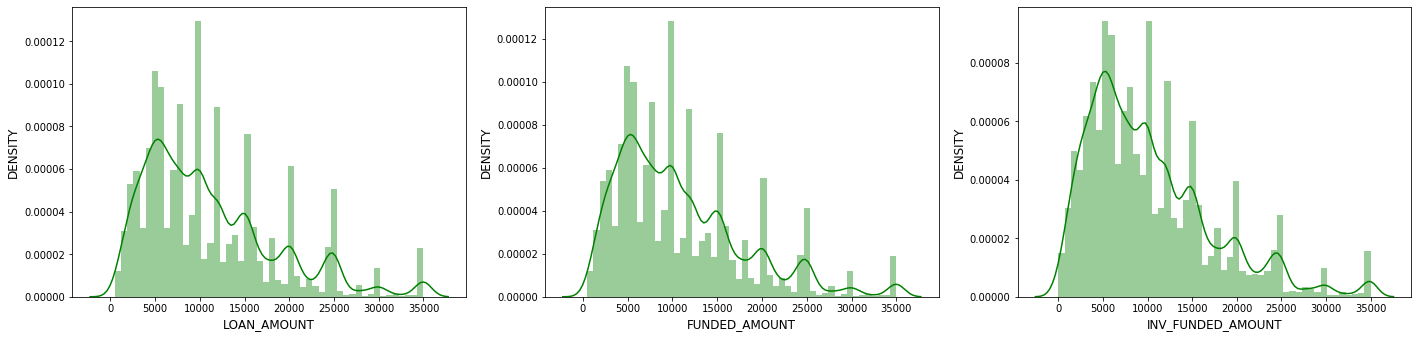

In [24]:
# Creating plots
fig = plt.figure(figsize=(24,40))
spec = fig.add_gridspec(6,3)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])

# Adding color preference
bg_color = 'white'
for selection in [fig, sec_01, sec_02, sec_03]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02, sec_03]

cnt = 0
for feature in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']:
    sns.distplot(data[feature], ax=sec[cnt], color='green')
    sec[cnt].set_ylabel('DENSITY' , fontsize=12)
    cnt+=1
    
sec_01.set_xlabel('LOAN_AMOUNT' , fontsize=12)
sec_02.set_xlabel('FUNDED_AMOUNT' , fontsize=12)
sec_03.set_xlabel('INV_FUNDED_AMOUNT' , fontsize=12)

plt.show()

##### OBSERVATION

* Density distribution for all the three features are similar. Hence, we can proceed forward to anlayse with any of the feature. 
* Based on the nature by description we will proceed forward with "loan_amnt".

##### UNIVARIATE ANALYSIS ON ANNUAL INCOME

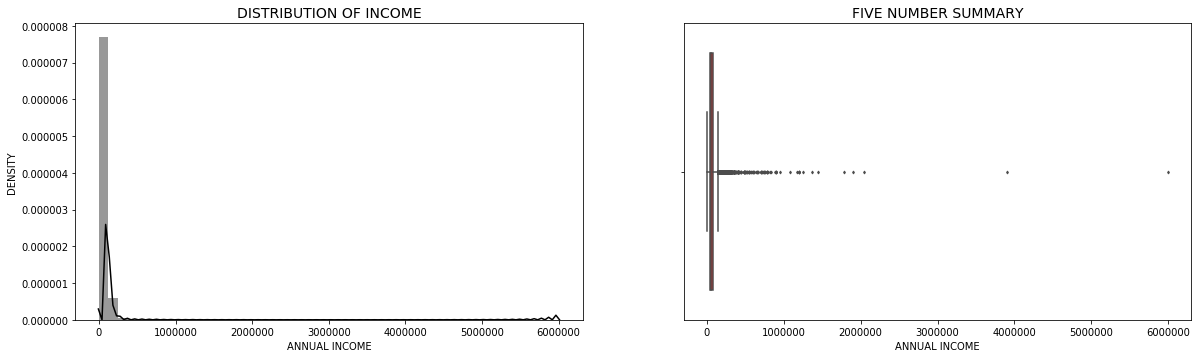

In [25]:
# Distribution plot and outlier plot
# Distribution plot
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
viz = sns.distplot(data['annual_inc'], color='black')
viz.set_title('DISTRIBUTION OF INCOME',fontsize=14,color='black')
viz.set_ylabel('DENSITY',fontsize =10,color = 'black')
viz.set_xlabel('ANNUAL INCOME',fontsize =10,color = 'black') 

# Outlier plot
plt.subplot(2,2,2)
viz = sns.boxplot(data['annual_inc'], color='red',fliersize=2)
viz.set_title('FIVE NUMBER SUMMARY',fontsize=14,color='black')
viz.set_xlabel('ANNUAL INCOME',fontsize =10,color = 'black')
plt.show()

In [26]:
# Numerical summary
print('Numerical Summary: ')
print('Mean:', data['annual_inc'].mean())
print('Median:', data['annual_inc'].quantile(0.5))
print('90% Data', data['annual_inc'].quantile(0.9))
print('99% Data:', data['annual_inc'].quantile(0.99))
print('100% Data:', data['annual_inc'].quantile(1))

Numerical Summary: 
Mean: 68777.97368120909
Median: 58868.0
90% Data 115000.0
99% Data: 234143.99999999878
100% Data: 6000000.0


##### UNIVARIATE ANALYSIS ON INTEREST RATE

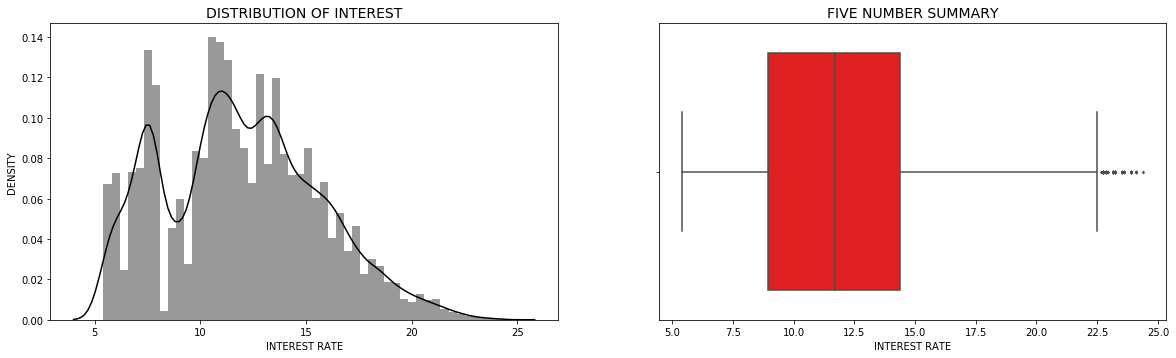

In [27]:
# Distribution plot and outlier plot
# Distribution plot
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
viz = sns.distplot(data['int_rate'], color='black')
viz.set_title('DISTRIBUTION OF INTEREST',fontsize=14,color='black')
viz.set_ylabel('DENSITY',fontsize =10,color = 'black')
viz.set_xlabel('INTEREST RATE',fontsize =10,color = 'black') 

# Outlier plot
plt.subplot(2,2,2)
viz = sns.boxplot(data['int_rate'], color='red',fliersize=2)
viz.set_title('FIVE NUMBER SUMMARY',fontsize=14,color='black')
viz.set_xlabel('INTEREST RATE',fontsize =10,color = 'black')
plt.show()

In [28]:
# Numerical summary
print('Numerical Summary: ')
print('Average interest rate:',np.round(data['int_rate'].mean()),'%')
print('Interest rate @75 percentile:',np.round(data['int_rate'].quantile(0.75)),'%')
print('Interest rate @90 percentile:',np.round(data['int_rate'].quantile(0.9)),'%')
print('Interest rate @99 percentile:',np.round(data['int_rate'].quantile(0.99)),'%')

Numerical Summary: 
Average interest rate: 12.0 %
Interest rate @75 percentile: 14.0 %
Interest rate @90 percentile: 17.0 %
Interest rate @99 percentile: 21.0 %


##### UNIVARIATE ANALYSIS ON LOAN AMOUNT

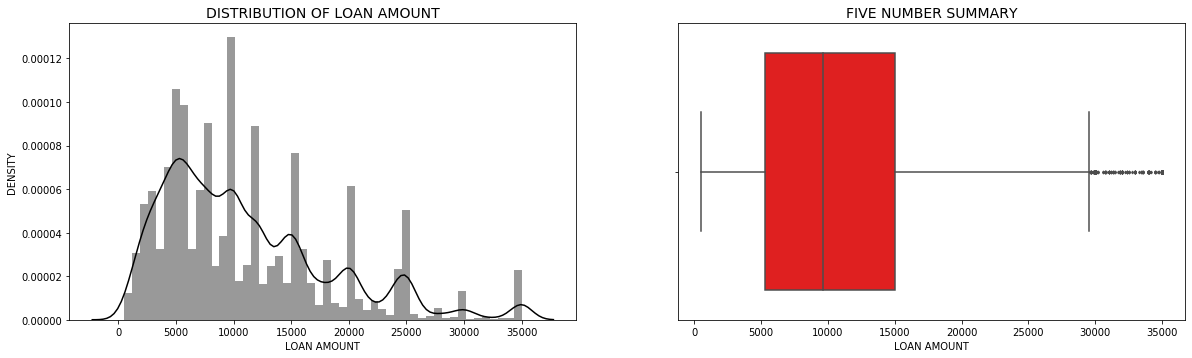

In [29]:
# Distribution plot and outlier plot
# Distribution plot
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
viz = sns.distplot(data['loan_amnt'], color='black')
viz.set_title('DISTRIBUTION OF LOAN AMOUNT',fontsize=14,color='black')
viz.set_ylabel('DENSITY',fontsize =10,color = 'black')
viz.set_xlabel('LOAN AMOUNT',fontsize =10,color = 'black')   

# Outlier plot
plt.subplot(2,2,2)
viz = sns.boxplot(data['loan_amnt'], color='red',fliersize=2)
viz.set_title('FIVE NUMBER SUMMARY',fontsize=14,color='black')
viz.set_xlabel('LOAN AMOUNT',fontsize =10,color = 'black')  
plt.show()

##### UNIVARIATE ANALYSIS ON LOANS / YEAR AND TENURE

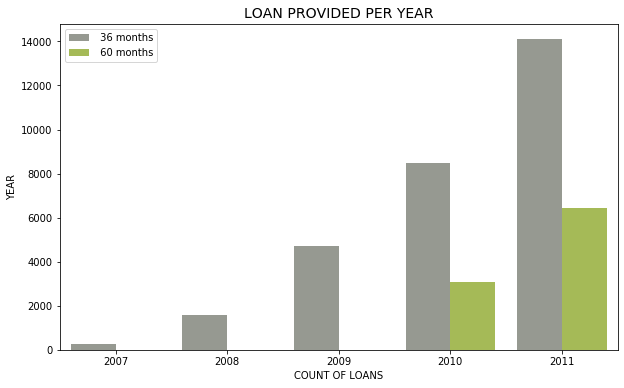

In [30]:
# Creating countplot
plt.figure(figsize=(10,6))
viz = sns.countplot(data['issue_year'], 
                    hue = data['term'],
                    order=data['issue_year'].value_counts(ascending = True).index,
                    palette=['#979A90', "#AECB46"])
viz.set_title('LOAN PROVIDED PER YEAR',fontsize=14,color='black')
viz.set_ylabel('YEAR',fontsize =10,color = 'black')
viz.set_xlabel('COUNT OF LOANS',fontsize =10,color = 'black')   
viz.legend(loc=2)
plt.show()

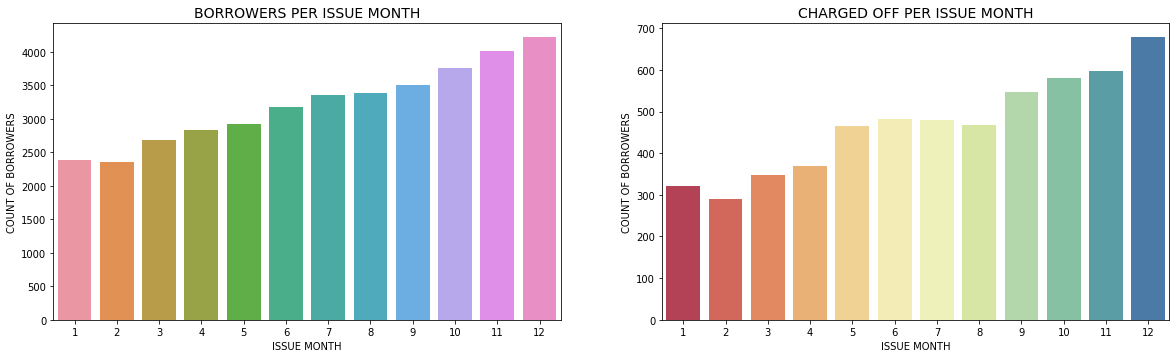

In [31]:
# Count plot for issue month
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
viz = sns.countplot('issue_month', data = data)
viz.set_title('BORROWERS PER ISSUE MONTH',fontsize=14,color='black')
viz.set_ylabel('COUNT OF BORROWERS',fontsize =10,color = 'black')
viz.set_xlabel('ISSUE MONTH',fontsize =10,color = 'black')  

# Count plot of charged off for issue month
plt.subplot(2,2,2)
viz = sns.countplot('issue_month',
                    palette= 'Spectral',
                    data = data[data['loan_status']=='Charged Off'])
viz.set_title('CHARGED OFF PER ISSUE MONTH',fontsize=14,color='black')
viz.set_ylabel('COUNT OF BORROWERS',fontsize =10,color = 'black')
viz.set_xlabel('ISSUE MONTH',fontsize =10,color = 'black')   
plt.show()

##### UNIVARIATE ANALYSIS ON PURPOSE OF LOAN

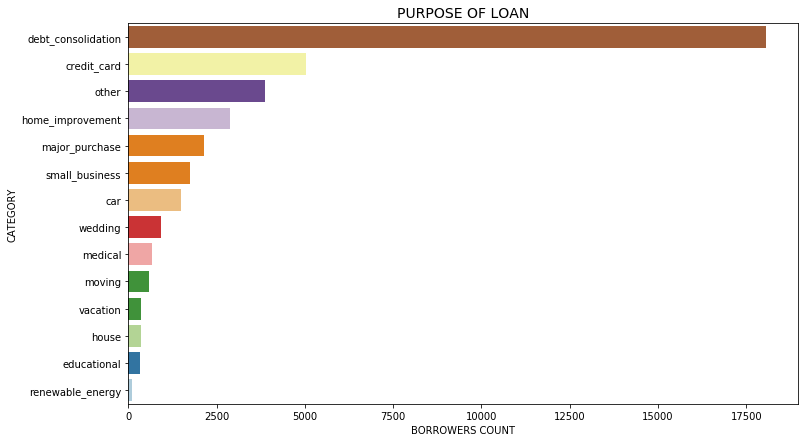

In [32]:
# Countplot for purpose
plt.figure(figsize=(12,7))
viz = sns.countplot(y=data['purpose'], 
                    order=data['purpose'].value_counts().index,
                    palette='Paired_r')
viz.set_title('PURPOSE OF LOAN',fontsize=14,color='black')
viz.set_ylabel('CATEGORY',fontsize =10,color = 'black')
viz.set_xlabel('BORROWERS COUNT',fontsize =10,color = 'black')   
plt.show()

##### UNIVARIATE ANALYSIS ON HOME OWNERSHIP

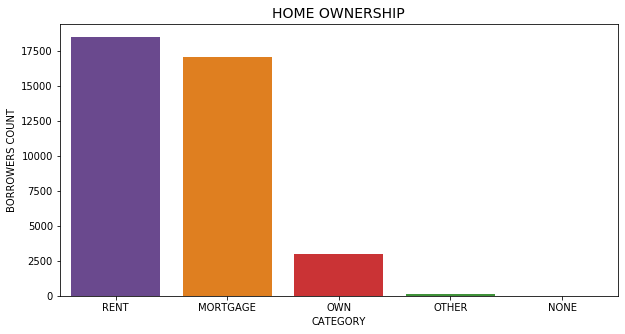

In [33]:
# Countplot for home ownership
plt.figure(figsize=(10,5))
viz = sns.countplot(data['home_ownership'], 
                    order=data['home_ownership'].value_counts().index,
                    palette='Paired_r')
viz.set_title('HOME OWNERSHIP',fontsize=14,color='black')
viz.set_xlabel('CATEGORY',fontsize =10,color = 'black')
viz.set_ylabel('BORROWERS COUNT',fontsize =10,color = 'black')   
plt.show()

### OBSERVATION ON UNVARIATE ANALYSIS

* Looks like the feature "annual_inc" has outliers in the upper fence.
* There is a huge jump between 99 and 100 % of data in "annual_inc" and that can be trimmed.
* The average interest rate is 12% but there is huge jump after 75 percentile.
* Most of the borrowers prefer to get loan amount between 5k to 15k.
* Almost of the borrowers gets interest rate between 9% to 14%.
* For each year number of borrowers keeps on increasing and they opt for 36 months tenure.
* Loans approved on Q4 are more likely to default.
* Most of the borrowings happens for debt consolidation and credit card bill payment.
* Very least of the borrowers has a own house.

### OUTLIER TREATMENT

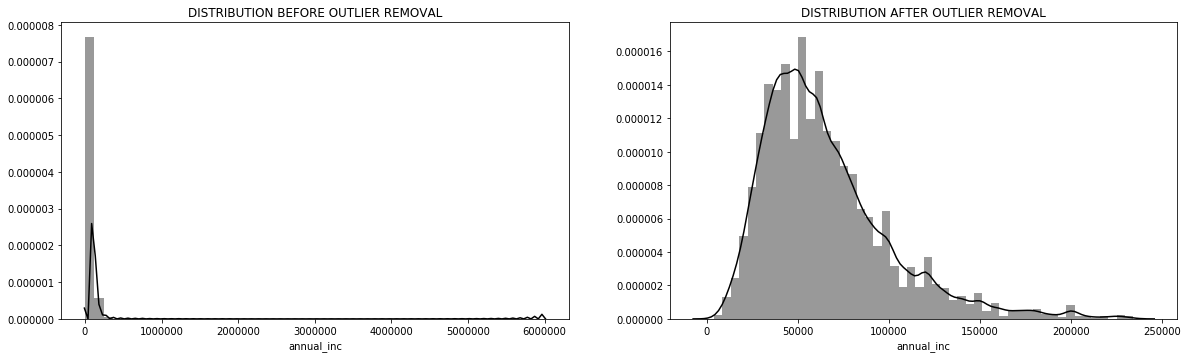

In [34]:
# Removing the data above 99% in upper fence of annual income

# Distribution plot before outlier removal
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
ax = sns.distplot(data['annual_inc'], color='black')
ax.set_title('DISTRIBUTION BEFORE OUTLIER REMOVAL')

# Removing outliers
data = data[data['annual_inc'] < data['annual_inc'].quantile(0.99)]

# Distribution plot after outlier removal
plt.subplot(2,2,2)
ax = sns.distplot(data['annual_inc'], color='black')
ax.set_title('DISTRIBUTION AFTER OUTLIER REMOVAL')
plt.show()

##### UNDERSTANDING FINANCIAL FEATURES

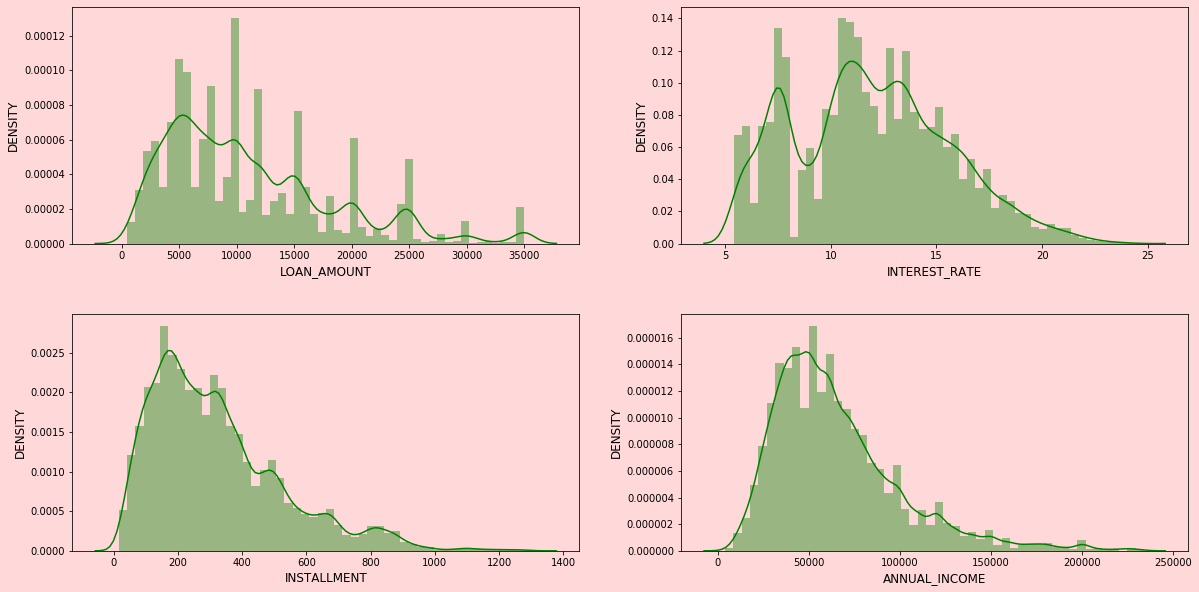

In [35]:
# Creating plots
fig = plt.figure(figsize=(20,10))
spec = fig.add_gridspec(2,2)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[1,0])
sec_04 = fig.add_subplot(spec[1,1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02, sec_03, sec_04]

cnt = 0
for feature in ["loan_amnt", "int_rate", "installment", "annual_inc"]:
    sns.distplot(data[feature], ax=sec[cnt], color='green')
    sec[cnt].set_ylabel('DENSITY' , fontsize=12)
    cnt+=1

# Naming the axis
sec_01.set_xlabel('LOAN_AMOUNT' , fontsize=12)
sec_02.set_xlabel('INTEREST_RATE' , fontsize=12)
sec_03.set_xlabel('INSTALLMENT' , fontsize=12)
sec_04.set_xlabel('ANNUAL_INCOME' , fontsize=12)

plt.show()

* Based on the nature of distribution **"loan_amnt", "int_rate", "annual_inc", "installment"** can be bucketed for further analysis.

##### CREATING BUCKETS FOR BIVARIATE ANALYSIS

In [36]:
# Creating categorical buckets for loan amount
data["loan_amnt_bkt"] = pd.cut(data['loan_amnt'], 
                               list(range(0,40001,7000)), 
                               labels = ['0 - 7k', '7k - 14k', '14k - 21k', '21k - 28k', '28k+'])

# Creating categorical buckets for interest rate
data["int_rate_bkt"] = pd.cut(data['int_rate'], 
                               list(range(5,26,5)), 
                               labels = ['5 - 10', '10 - 15', '15 - 20', '20+'])


# Creating categorical buckets for annual income
data['annual_inc_bkt'] = pd.cut(data['annual_inc'],
                                 list(range(0,250001,50000)), 
                                 labels = ['0 - 50k', '50k - 100k', '100k - 150k', '150k - 200k', '200k+'])

# Creating categorical buckets for installment
data["installment_bkt"] = pd.cut(data['installment'], 
                               list(range(0,1401,200)), 
                               labels = ['0 - 200', '200 - 400', '400 - 600', '600 - 800', 
                                         '800 - 1000', '1000 - 12000', '12000+'])


##### VISUALIZING THE BUCKETS

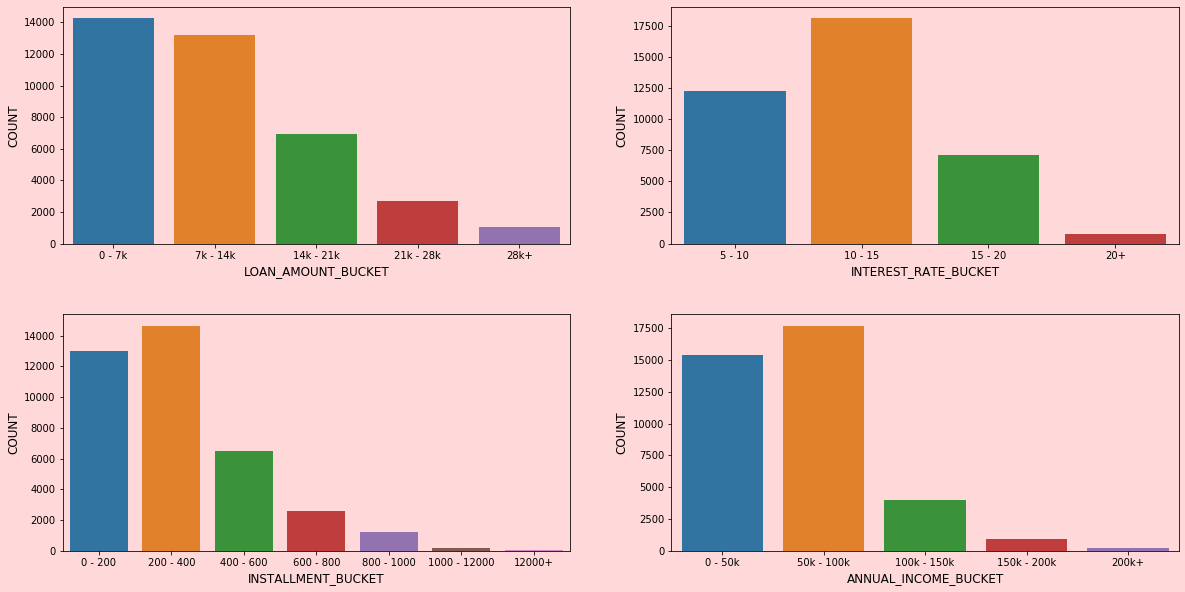

In [37]:
# Creating plots
fig = plt.figure(figsize=(20,10))
spec = fig.add_gridspec(2,2)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[1,0])
sec_04 = fig.add_subplot(spec[1,1])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02, sec_03, sec_04]

cnt = 0
for feature in ['loan_amnt_bkt', 'int_rate_bkt', 'installment_bkt', 'annual_inc_bkt']:
    sns.countplot(data[feature], ax=sec[cnt])
    sec[cnt].set_ylabel('COUNT' , fontsize=12)
    cnt+=1

# Naming the axis
sec_01.set_xlabel('LOAN_AMOUNT_BUCKET' , fontsize=12)
sec_02.set_xlabel('INTEREST_RATE_BUCKET' , fontsize=12)
sec_03.set_xlabel('INSTALLMENT_BUCKET' , fontsize=12)
sec_04.set_xlabel('ANNUAL_INCOME_BUCKET' , fontsize=12)

plt.show()

### BIVARIATE ANALYSIS

* Moving forward in bivariate analysis we just need the data of "Charged Off" borrowers.
* So, we create a new dataframe that has only "Charged Off" borrowers data.

In [38]:
# Creating dataframe with feature value "Charged Off":
co_data = data[data['loan_status'] == 'Charged Off']

# Looking into the nature of data:
print(f'The trimmed data has {co_data.shape[0]} rows and {co_data.shape[1]} columns')
print(f'The unique value is {co_data["loan_status"].unique()}')


The trimmed data has 5584 rows and 29 columns
The unique value is ['Charged Off']


##### EMPLOYMENT LENGHT VS LOAN STATUS

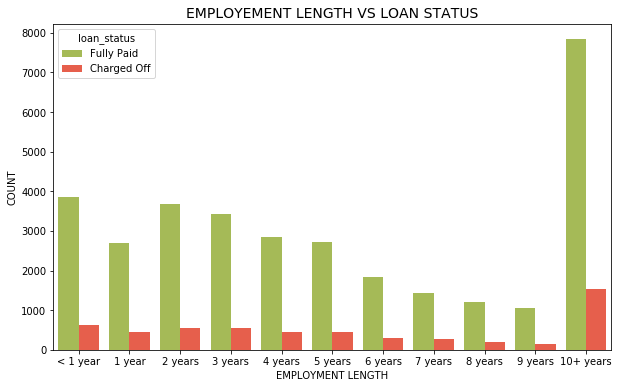

In [39]:
# Countplot for employment length by loan status as hue
plt.figure(figsize=(10,6))
ax = sns.countplot(data['emp_length'],
              hue = data['loan_status'],
              order=['< 1 year',  '1 year','2 years','3 years', '4 years',  
                     '5 years', '6 years', '7 years',  '8 years', '9 years', '10+ years'],
              palette=['#AECB46', "#FF4C33"],
              data = data)

# Naming the axis and title
ax.set_title('EMPLOYEMENT LENGTH VS LOAN STATUS',fontsize=14,color='black')
ax.set_ylabel('COUNT',fontsize =10,color = 'black')
ax.set_xlabel('EMPLOYMENT LENGTH',fontsize =10,color = 'black')
plt.show()

##### HOME OWNERSHIP VS LOAN AMOUNT

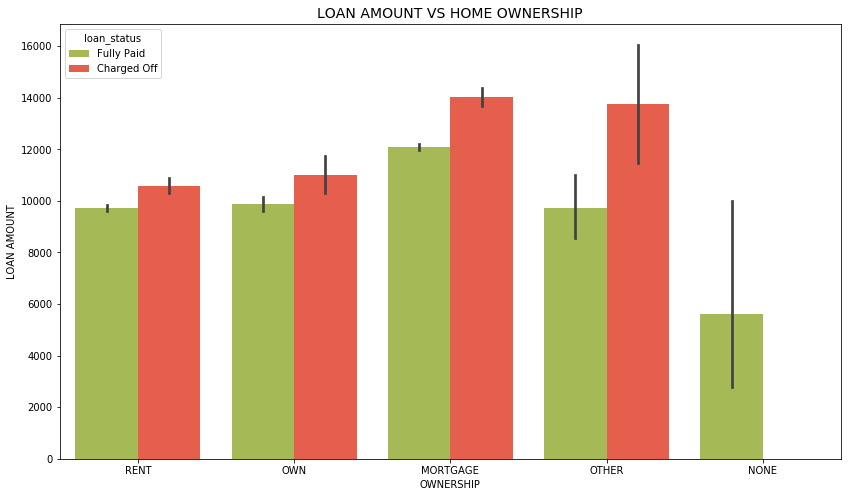

In [40]:
# Bar plot for loan amount by home ownership
plt.figure(figsize=(14,8))
ax = sns.barplot(data =data, 
                 x='home_ownership',
                 y='loan_amnt', 
                 hue ='loan_status',
                 palette=['#AECB46', "#FF4C33"])

# Naming the axis and title
ax.set_title('LOAN AMOUNT VS HOME OWNERSHIP',fontsize=14,color='black')
ax.set_xlabel('OWNERSHIP',fontsize =10,color = 'black')
ax.set_ylabel('LOAN AMOUNT',fontsize =10,color = 'black')
plt.show()

##### LOAN AMOUNT VS PURPOSE

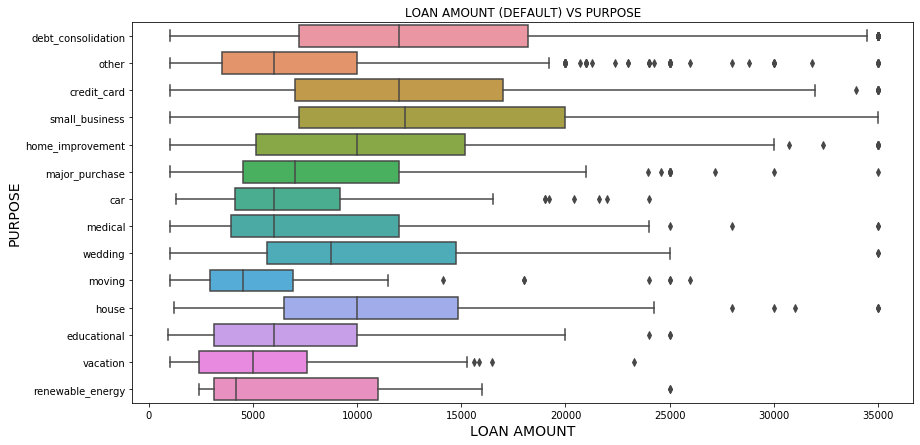

In [41]:
# Box plot for loan amount vs purpose
plt.figure(figsize=(14,7))
viz = sns.boxplot(x='loan_amnt', 
            y='purpose', 
            order=co_data['purpose'].value_counts().index,
            data=co_data)

# Naming the axis and title
viz.set_xlabel('LOAN AMOUNT', fontsize = 14)
viz.set_ylabel('PURPOSE', fontsize = 14)
viz.set_title('LOAN AMOUNT (DEFAULT) VS PURPOSE')
plt.show()

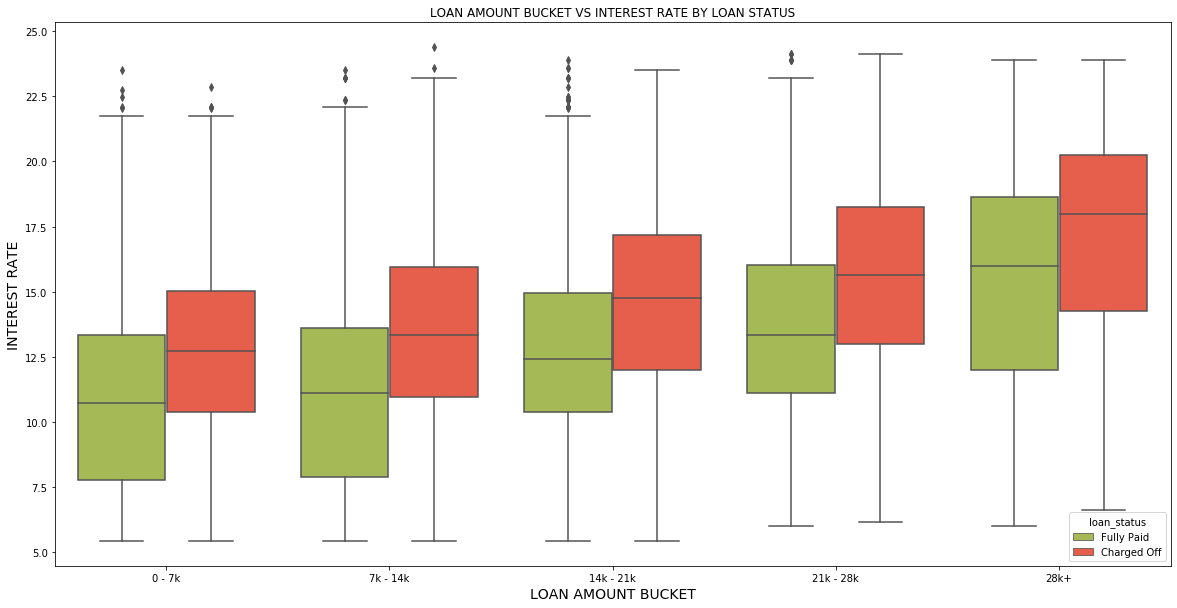

In [42]:
# Box plot for loan amount bucket vs interest rate by loan status as hue
plt.figure(figsize=(20,10))
viz = sns.boxplot(x='loan_amnt_bkt', 
            y='int_rate', 
            hue = 'loan_status',
            order=data['loan_amnt_bkt'].value_counts().index,
            palette=['#AECB46', "#FF4C33"],
            data=data)

# Naming the axis and title
viz.set_xlabel('LOAN AMOUNT BUCKET', fontsize = 14)
viz.set_ylabel('INTEREST RATE', fontsize = 14)
viz.set_title('LOAN AMOUNT BUCKET VS INTEREST RATE BY LOAN STATUS')
plt.show()

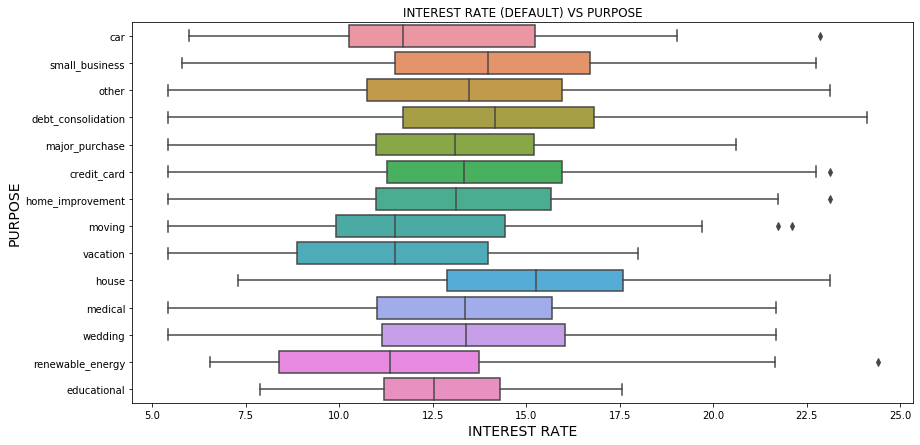

In [43]:
# Box plot for interest rate vs purpose
plt.figure(figsize=(14,7))
viz = sns.boxplot(x='int_rate', 
            y='purpose',
            data=co_data)

# Naming the axis and title
viz.set_xlabel('INTEREST RATE', fontsize = 14)
viz.set_ylabel('PURPOSE', fontsize = 14)
viz.set_title('INTEREST RATE (DEFAULT) VS PURPOSE')
plt.show()

##### INTEREST RATE VS TERM

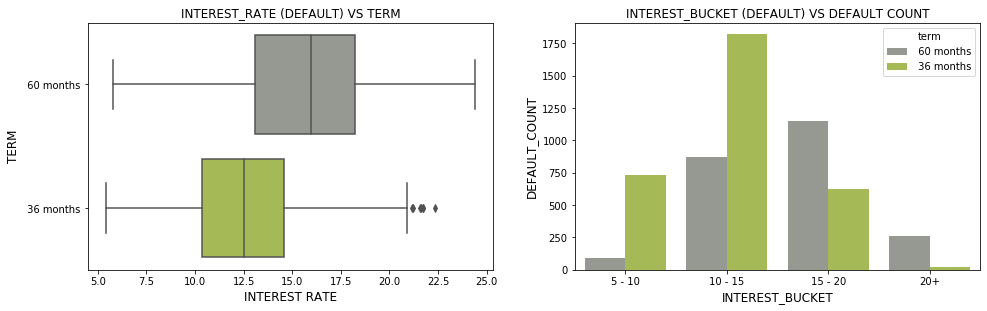

In [44]:
# Box plot for interest rate vs term
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
viz = sns.boxplot(x='int_rate', 
            y='term',
            palette=['#979A90',"#AECB46"],
            data=co_data)
# Naming the axis and title
viz.set_xlabel('INTEREST RATE', fontsize = 12)
viz.set_ylabel('TERM', fontsize = 12)
viz.set_title('INTEREST_RATE (DEFAULT) VS TERM')

# Count plot for interest rate vs default count by term as hue
plt.subplot(2,2,2)
viz = sns.countplot(co_data['int_rate_bkt'],
              hue=co_data['term'], 
              palette=['#979A90', "#AECB46"],
              data = co_data)
# Naming the axis and title
viz.set_xlabel('INTEREST_BUCKET', fontsize = 12)
viz.set_ylabel('DEFAULT_COUNT', fontsize = 12)
viz.set_title('INTEREST_BUCKET (DEFAULT) VS DEFAULT COUNT')

plt.show()

##### LOAN AMOUNT VS GRADE

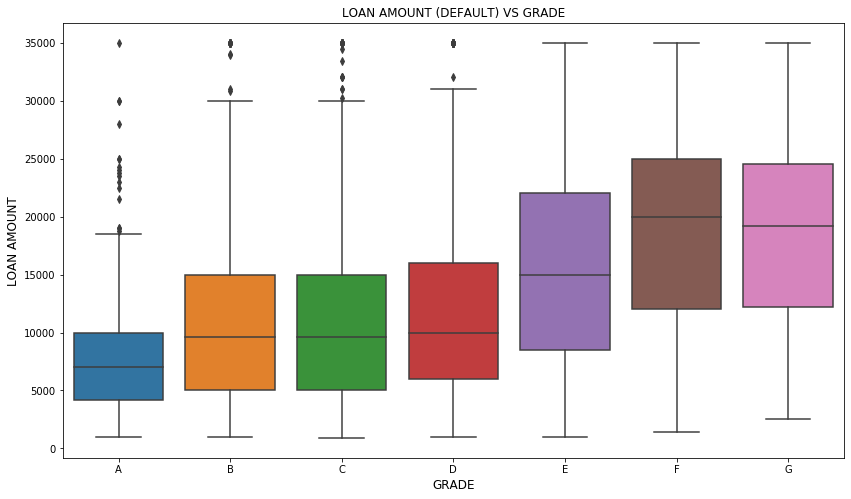

In [45]:
# Box plot for loan amount vs grade
plt.figure(figsize=(14,8))
viz = sns.boxplot(y='loan_amnt', 
            x='grade', 
            order=['A','B','C','D','E','F','G'],
            data=co_data)

# Naming the axis and title
viz.set_ylabel('LOAN AMOUNT', fontsize = 12)
viz.set_xlabel('GRADE', fontsize = 12)
viz.set_title('LOAN AMOUNT (DEFAULT) VS GRADE')
plt.show()

##### LOAN AMOUNT VS VERIFICATION STATUS

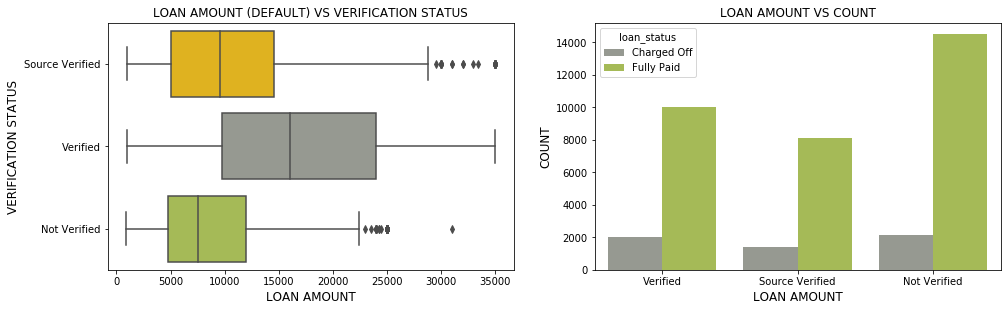

In [46]:
# Box plot for loan amount vs verification status
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
viz = sns.boxplot(x='loan_amnt', 
            y='verification_status',
            palette=["#FFC300", '#979A90', "#AECB46"],
            data=co_data)
# Naming the axis and title
viz.set_xlabel('LOAN AMOUNT', fontsize = 12)
viz.set_ylabel('VERIFICATION STATUS', fontsize = 12)
viz.set_title('LOAN AMOUNT (DEFAULT) VS VERIFICATION STATUS')

# Count plot for verification status vs count by loan_status as hue
plt.subplot(2,2,2)
viz = sns.countplot(data['verification_status'],
              hue=data['loan_status'].sort_values(), 
              palette=['#979A90', "#AECB46"],
              data = data)
# Naming the axis and title
viz.set_xlabel('LOAN AMOUNT', fontsize = 12)
viz.set_ylabel('COUNT', fontsize = 12)
viz.set_title('LOAN AMOUNT VS COUNT')
plt.show()

##### INSTREST RATE VS INSTALLEMENT

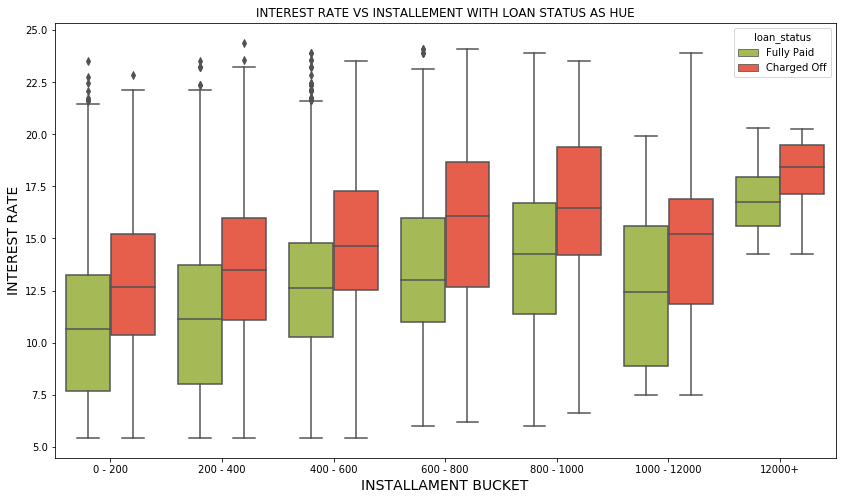

In [47]:
# Box plot for installment bucket vs interest rate by loan status as hue
plt.figure(figsize=(14,8))
viz = sns.boxplot(x='installment_bkt', 
            y='int_rate', 
            hue = 'loan_status',
            palette=['#AECB46', "#FF4C33"],
            data=data)

# Naming the axis and title
viz.set_xlabel('INSTALLAMENT BUCKET', fontsize = 14)
viz.set_ylabel('INTEREST RATE', fontsize = 14)
viz.set_title('INTEREST RATE VS INSTALLEMENT WITH LOAN STATUS AS HUE')
plt.show()

### OBSERVATION FOR BIVARIATE ANALYSIS

* Borrowers with 10+ years of employment length are more likely to charge off.
* Borrowers living on mortgage with loan amount greater than 12k are likely to charge off.
* Loan for debt consolidation, credit card, small business with average loan amount greater than 12000 are more likely to default.
* Loan with highest interest rate in all buckets are more likely to charge off.
* Loan provided for house, debt consolidation, small business with highest interest rate are more likely to charge off.
* Longer tenure has the higher interest rate and people in this term with interest rate between 15-20% is more likely to charge off.
* Shorter tenure has the lower interest rate and people in this term with interest rate between 10-15% is more likely to charge off.
* Borrower within grade E,F,G and with average loan amount greater than 15000 are more likely to charge off.
* Borrowers with verification status "not-verified" has loan amount with 5k to 12.5k are more likely to charge off.
* Borrowers with verification status "not-verified" and "verified" has a equal proportion in charge off.
* As the number of installment increase the borrowers with high interest rate are more likely to charge off.

### MULTIVARIATE ANALYSIS

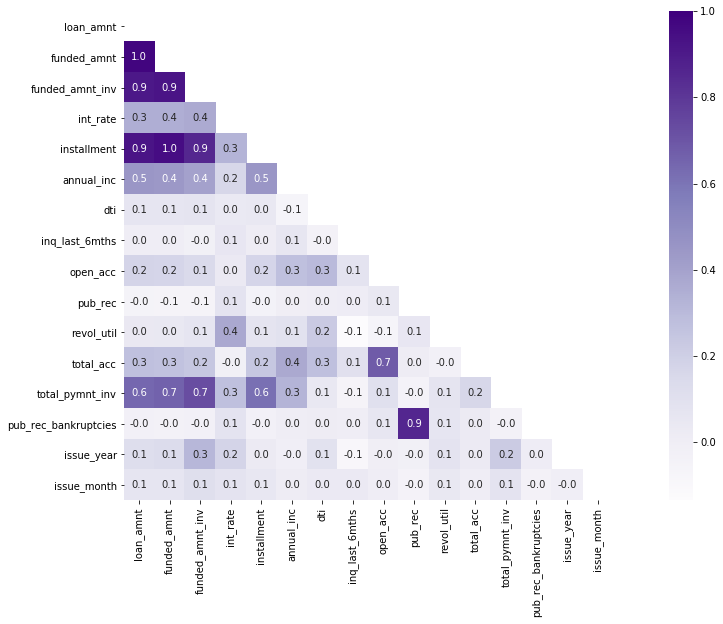

In [48]:
# Creating a correlation heatmap
plt.figure(figsize=(20,9))
correlation = co_data.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt = '.1f', mask=mask, square=True, cmap='Purples')
plt.show()

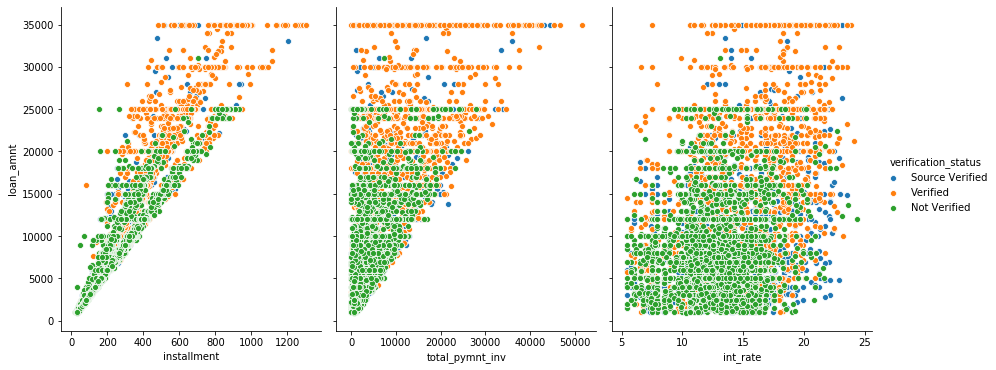

In [49]:
# Plotting a pair plot for 'installment', 'total_pymnt_inv', 'int_rate' vs loan amount by verification status as hue
sns.pairplot(co_data,
             x_vars=['installment', 'total_pymnt_inv', 'int_rate'],
             y_vars=['loan_amnt'],
             diag_kind=None,
             hue='verification_status',
             height=5,
             aspect=0.8,
             kind='scatter')

plt.show()

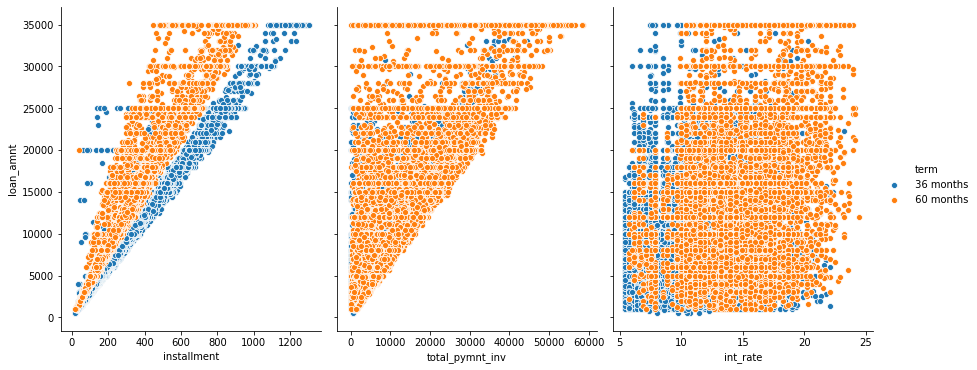

In [50]:
# Plotting a pair plot for 'installment', 'total_pymnt_inv', 'int_rate' vs loan amount by term as hue
sns.pairplot(data,
             x_vars=['installment', 'total_pymnt_inv', 'int_rate'],
             y_vars=['loan_amnt'],
             diag_kind=None,
             hue='term',
             height=5,
             aspect=0.8,
             kind='scatter')

plt.show()

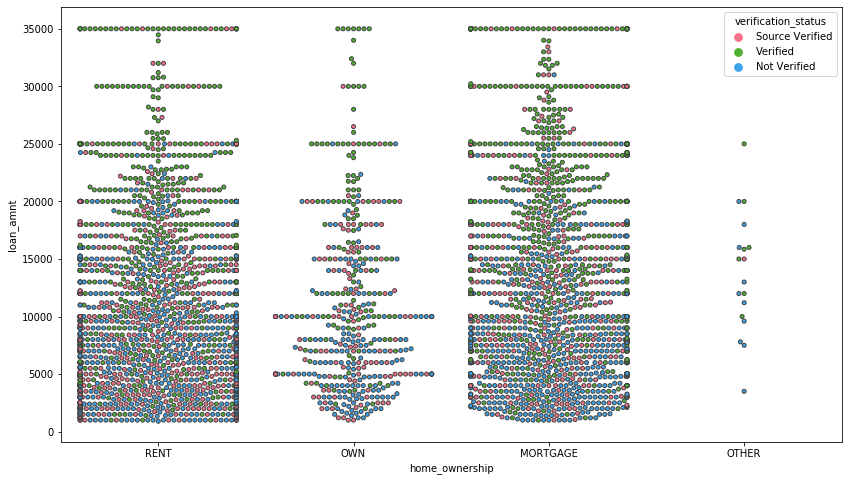

In [51]:
# Plotting a swarm plot for home ownership vs loan amount by term as hue
plt.figure(figsize=(14,8))
sns.swarmplot(x='home_ownership', 
              y='loan_amnt', 
              data=co_data,
              size=4,
              hue='verification_status',
              palette='husl',
              linewidth=1) 

plt.show()

### OBSERVATION FOR MULTIVARIATE ANALYSIS

* From Correlation Heatmap,
    * loan_amnt has strong positve correlation with installment, total_payment_inv.
    * loan_amnt has intermediate positive correlation with annual_inc, int_rate, total_acc.
    * open_acc has strong positive correlation with total_acc.
    * pub_rec has strong positve correlation with pub_rec_bankruptcies.
    
* From Pairplot,
    * When the loan amount increases, number of installment, total_pymnt_inv, int_rate also increases. 
    * Borrowers with verification status "Not-Verified" are most likely to get loan less than 25k (Charge off).
    * Borrowers with verification status "Verified" are most likely to get loan greater than 25k (Charge off).
    * Borrowers with lower term has higher installments comparatively.
    * Borrowers with 60 months term has highest share to total_pymnt_inv.

* From Swarmplot,
    * Across all categories of home ownership, borrowers with loan amount less than 25k are most like to be source verified.
    * Across all categories of home ownership, borrowers with loan amount greater than 25k gets verified.

### DRIVING FACTORS TO CHARGE OFF

* Borrowers with high interest and 10+ years of employment length.
* Borrowers living on mortgage with loan amount greater than 12000.
* Loan for debt consolidation, credit card, small business with loan amount greater than 12000.
* For any loan amount provided with an average interest rate higher than 13%.
* Loan provided for house purpose with average interest grater than 15%.
* Loan provided with an average of 12.5% interest rate for 36months of tenure.
* Loan provided with an average of 16.5% interest rate for 60months of tenure.
* Average loan amount greater than 15000 with grade E, F, G.
* Installments between 800 - 12000 with average interest greater than 15%.
* Average interest rate of 17% with installment greater than 12000.

***This Notebook is developed as a case study required for Executive PG Programme in Machine Learning & AI - IIIT, Bangalore***


*Reach out to contributers,*
* [Suresh Krishna - Linkedin](https://github.com/Sureshkrishh)
* [Vaidehiu - Linkedin](https://github.com/vaidehiu)